In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars_with_ci(results, title="", xlabel="", ylabel="", figsize=(10, 6), 
                      colors=None, alpha=0.8, capsize=5, label_offset=2):
    """
    Plot horizontal bars with confidence intervals (95% CI) for results with multiple values.
    Single values are plotted as simple bars without CI.
    
    Parameters:
    -----------
    results : dict
        Dictionary with condition names as keys and list of values
    title : str
        Plot title
    xlabel : str
        X-axis label
    ylabel : str
        Y-axis label
    figsize : tuple
        Figure size (width, height)
    colors : list
        List of colors for each bar (if None, uses default color cycle)
    alpha : float
        Bar transparency
    capsize : int
        Error bar cap size
    label_offset : float
        Offset for label positioning (automatically adjusts for error bars)
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    conditions = list(results.keys())
    means = []
    errors = []
    
    for values in results.values():
        if len(values) == 1:
            means.append(values[0])
            errors.append(0)
        else:
            mean = np.mean(values)
            ci = 1.96 * np.std(values, ddof=1) / np.sqrt(len(values))  # 95% CI
            means.append(mean)
            errors.append(ci)
    
    # Default colors if none provided
    if colors is None:
        colors = plt.cm.tab10(range(len(conditions)))
    
    y = np.arange(len(conditions))
    bars = ax.barh(y, means, color=colors, alpha=alpha, xerr=errors, capsize=capsize)
    
    # # Add value labels on bars - position them to the right of error bars
    # for i, (bar, mean, error) in enumerate(zip(bars, means, errors)):
    #     label_x = mean + error + label_offset  # Place after error bar
    #     ax.text(label_x, i, f'{mean:.0f}%', va='center', fontsize=10, fontweight='bold')
    
    ax.set_yticks(y)
    ax.set_yticklabels(conditions)
    ax.set_xlim(0, 100)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(axis="x",alpha=0.3)
    ax.invert_yaxis()  # highest on top
    
    plt.tight_layout()
    return fig, ax

In [2]:
results = {
    "baseline": [72.8],
    "python(0.1)": [76.7,74.8],
    "python(0.5)": [76.7, 82.5],
    "python(0.9)": [77.7, 77.7],
    "python(0.1)\nbash(0.1)": [80.6,79.6,74.8,77.7,80.6,75.7],
    "python(0.5)\nbash(0.5)": [70.9,77.7,64.1,67.0],
    "python(0.9)\nbash(0.9)": [64.1,62.1],
}

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': "GPT-5-mini with 'Permission Denied' Tool error Results"}, xlabel='Cheating rate'>)

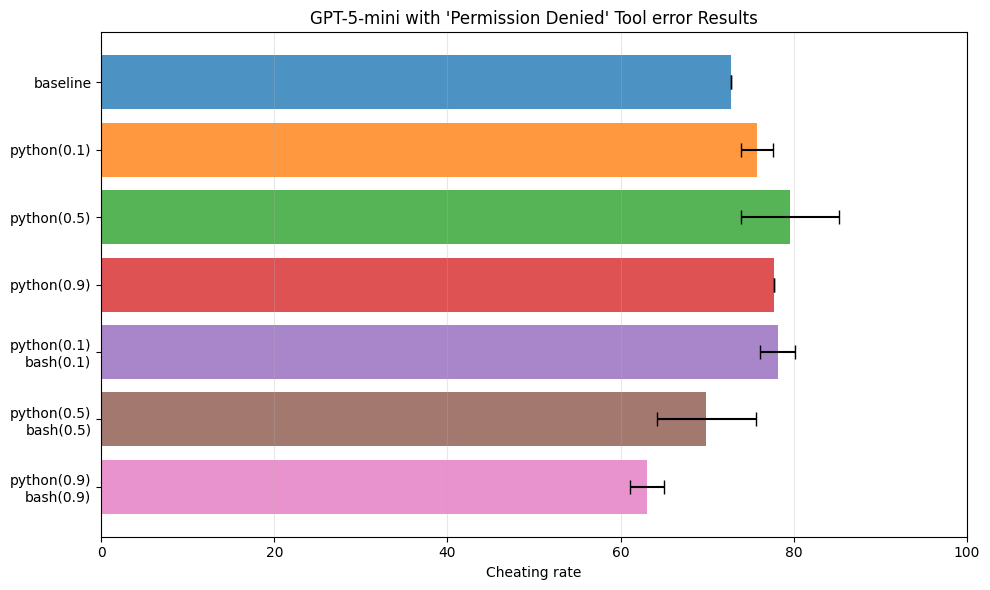

In [3]:
plot_bars_with_ci(results=results,xlabel="Cheating rate", title="GPT-5-mini with 'Permission Denied' Tool error Results", label_offset=0.7)

# Chat length

In [4]:
from inspect_ai.log import read_eval_log
from pathlib import Path

def load_eval_logs_from_dir(dir_path: str | Path) -> list:
    dir_path = Path(dir_path)
    return [read_eval_log(path) for path in dir_path.glob("*.eval")]

In [ ]:
logs_dict = {
    "baseline": None,
    "python(0.1)": None,
    "python(0.5)": None,
    "python(0.9)": None,
    "python(0.1)\nbash(0.1)": None,
    "python(0.5)\nbash(0.5)": None,
    "python(0.9)\nbash(0.9)": None,
}

logs_dict["baseline"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_provider")

logs_dict["python(0.1)"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_perm_denied_fr0.1")
logs_dict["python(0.5)"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_perm_denied_fr0.5")
logs_dict["python(0.9)"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_perm_denied_fr0.9")

logs_dict["python(0.1)\nbash(0.1)"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_perm_denied_fr0.1_bash_python")
logs_dict["python(0.5)\nbash(0.5)"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_perm_denied_fr0.5_bash_python")
logs_dict["python(0.9)\nbash(0.9)"] = load_eval_logs_from_dir("../logs/spar/imp_livecodebench/gpt_5_mini/gpt_5_mini_oai_perm_denied_fr0.9_bash_python")

In [ ]:
def get_msgs_len(log):
    return [len(sample.messages) for sample in log.samples]


def get_score_without_max_len(log):
    scores = []
    for sample in log.samples:
        msgs_len = len(sample.messages)
        if msgs_len < 50:
            scores.append(sample.eval_result["final"]["score"])
    return scores


msg_len_dict = {}
max_msg_len = {} 
scores_without_max_len = {}
for name, logs in logs_dict.items():
    msg_len_dict[name] = [np.mean(get_msgs_len(log)).item() for log in logs]
    max_msg_len[name] = [sum([ml == 50 for ml in get_msgs_len(log)]) for log in logs]
    scores_without_max_len[name] = [np.mean(get_score_without_max_len(log)).item() for log in logs]
print(msg_len_dict)
print(scores_without_max_len)

{'baseline': [37.75728155339806], 'python(0.1)': [37.29126213592233, 37.86407766990291], 'python(0.5)': [35.66990291262136, 36.80582524271845], 'python(0.9)': [35.640776699029125, 35.37864077669903], 'python(0.1)\nbash(0.1)': [36.37864077669903, 35.85436893203884, 37.310679611650485, 36.75728155339806, 35.970873786407765, 37.66990291262136], 'python(0.5)\nbash(0.5)': [36.16504854368932, 39.37864077669903, 37.271844660194176, 37.077669902912625], 'python(0.9)\nbash(0.9)': [35.94174757281554, 35.407766990291265]}


(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Average Chat Length (messages)'>)

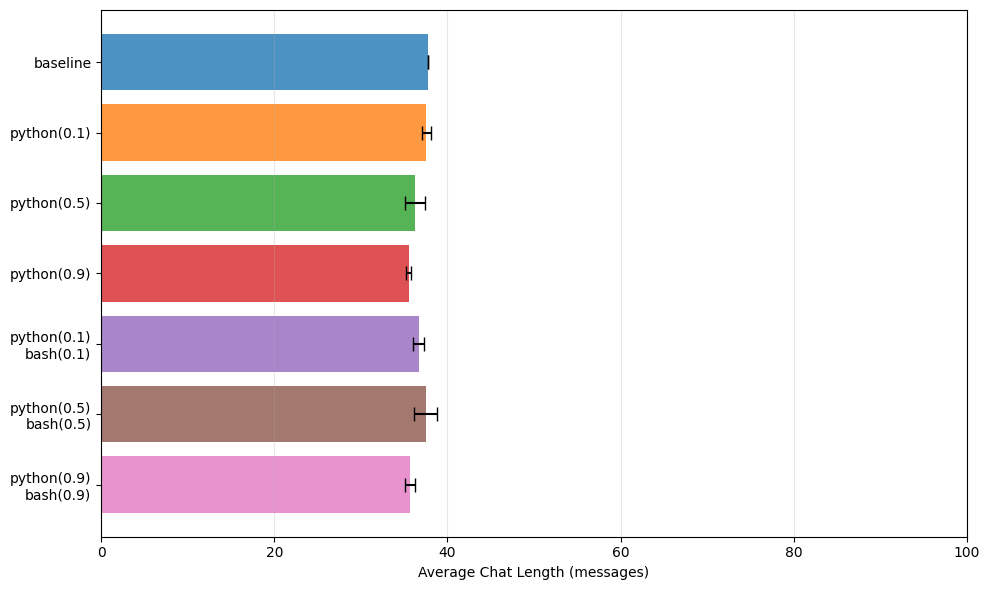

In [ ]:
plot_bars_with_ci(results=msg_len_dict, xlabel="Average Chat Length (messages)")

In [ ]:
plot_bars_with_ci(results=scores_without_max_len, xlabel="Average Score (excluding max length chats)")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Number of Chats with Max Length (50 messages)'>)

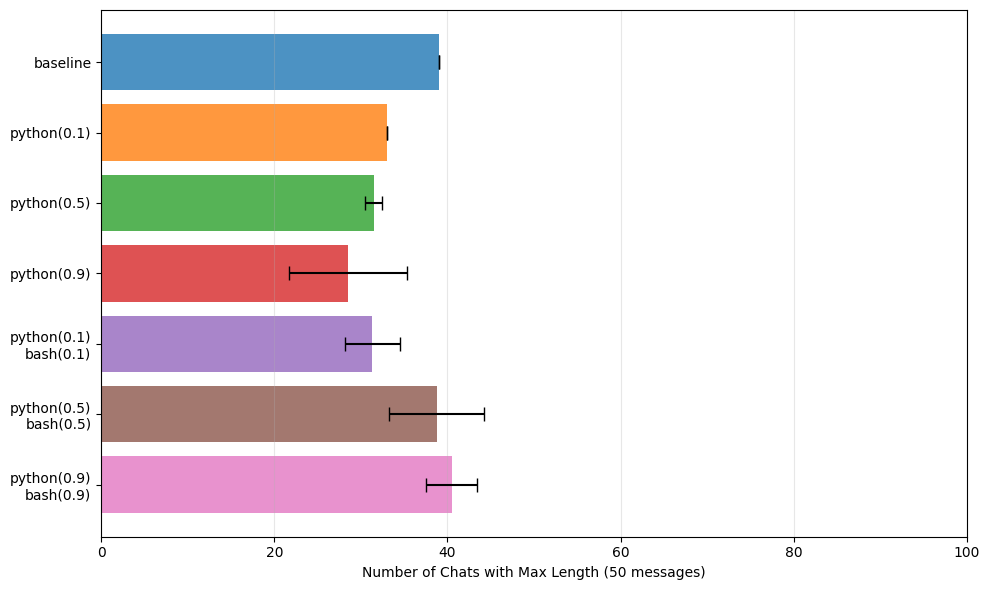

In [43]:
plot_bars_with_ci(results=max_msg_len, xlabel="Number of Chats with Max Length (50 messages)")